This step focuses on Pre-processing & Training Data Development.The goal of this step is to normalize and standardize all the features in your data, as well as create a validation set.


**_Importing libraries_**

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here. A convenience interface for specifying models using formula strings and DataFrames. 
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here. 
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Data Cleaning and Wrangling 

**_Loading Appliances Energy Usage Data_**

In [2]:
appliances_data = pd.read_csv('C:/Users/msale/Documents/Springboard Data Science Track_Jan 2022/Springboard-Capstone-Two/raw_data/energydata.csv')

_Data Science Problem_

The purpose of this data science project is to come up with a model to predict the applainces energy usage based on consumner's house temperature and humidity conditions plus outside enviromental conditions 

In [3]:
appliances_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
appliances_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
appliances_data.isnull().values.any()

False

In [6]:
appliances_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

**_This is a data set with no missing values_ :)**

**_Rename columns for more readability_**

In [7]:
appliances_data= appliances_data.rename(index=str, columns={"Appliances":"Appliances_E_Wh", "lights": "Lights_E_Wh","T1":"T_Kitchen", "RH_1":"H_Kitchen", "T2":"T_Living", "RH_2":"H_Living", "T3":"T_Laundry", "RH_3":"H_Laundry", "T4":"T_Office", "RH_4":"H_Office", "T5":"T_Bathroom", "RH_5":"H_Bathroom", "T6":"T_Building_out_NS", "RH_6":"H_Building_out_NS",
"T7":"T_Ironning", "RH_7":"H_Ironing", "T8":"T_Teenager", "RH_8":"H_Teenager", "T9":"T_Parents", "RH_9":"H_Parents", "Press_mm_hg": "Press_out", "RH_out":"H_out", "rv1":"RV_1", "rv2": "RV_2"})

In [8]:
appliances_data.head()

,date,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,...,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint,RV_1,RV_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
appliances_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances_E_Wh,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
Lights_E_Wh,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T_Kitchen,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
H_Kitchen,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T_Living,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
H_Living,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T_Laundry,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
H_Laundry,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T_Office,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
H_Office,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


_Appliances_E_Wh_ std is higehr than mean value! Same is true for _Lights_E_Wh_ These seem to be abnormal distributions.  

In [10]:
df = appliances_data # calling our tidy DataFrame df

In [11]:
df['Appliances_E_Wh'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances_E_Wh, dtype: float64

In [12]:
df['Appliances_E_Wh'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances_E_Wh, Length: 92, dtype: int64

In [13]:
df['Lights_E_Wh'].describe()

count    19735.000000
mean         3.801875
std          7.935988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: Lights_E_Wh, dtype: float64

In [14]:
df['Lights_E_Wh'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: Lights_E_Wh, dtype: int64

**_Generating histograms of the numeric columns_**

In [15]:
df= df.drop(["RV_1", "RV_2"],axis=1)  # dropping two random variables 

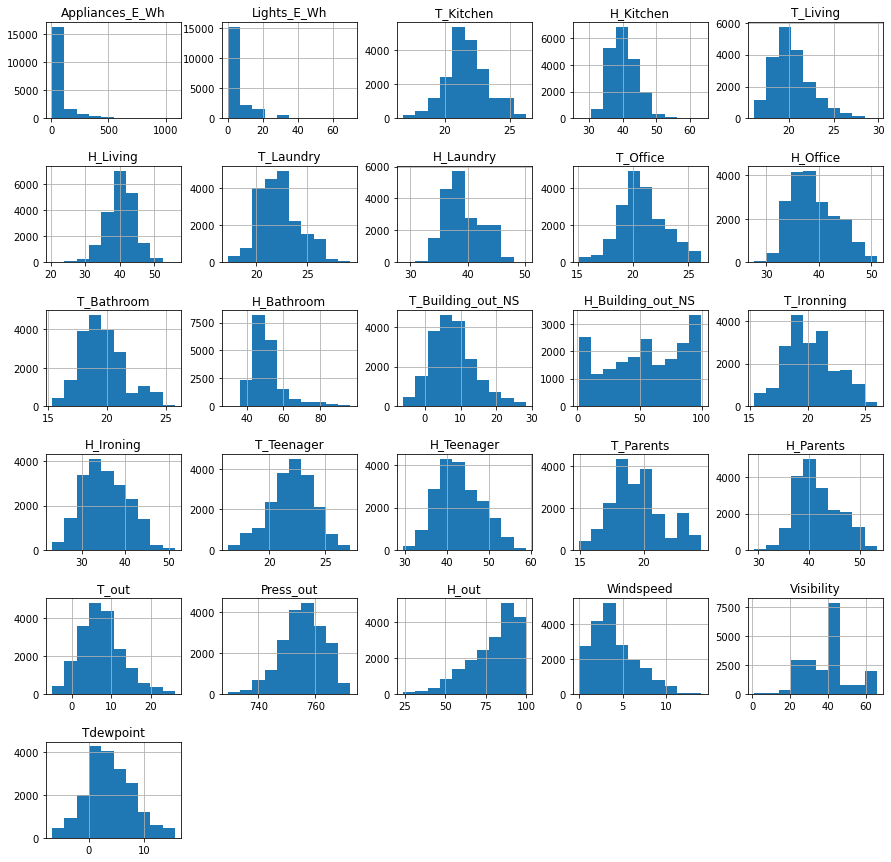

In [16]:
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

_**Appliances_E_Wh & Lights_E_Wh_** are heavily skewed to the left. **H_Building_out_NS** has a strange distribution and that for **H_out** is skewed to the right. _Visibility_ also looks abnormal. 

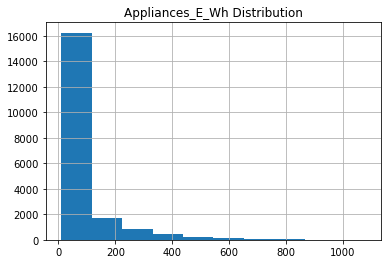

In [17]:
df['Appliances_E_Wh'].hist() 
plt.title("Appliances_E_Wh Distribution")
plt.subplots_adjust(hspace=0.5);

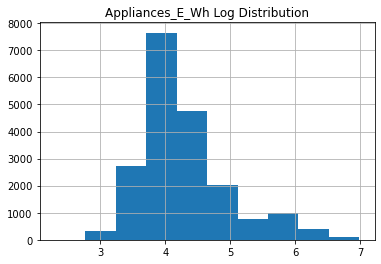

In [18]:
np.log(df['Appliances_E_Wh']).hist()  # log transformation makes the hist plot more appealing and normal
plt.title("Appliances_E_Wh Log Distribution")
plt.subplots_adjust(hspace=0.5);

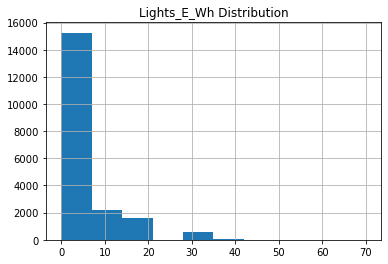

In [19]:
df['Lights_E_Wh'].hist()
plt.title("Lights_E_Wh Distribution")
plt.subplots_adjust(hspace=0.5);

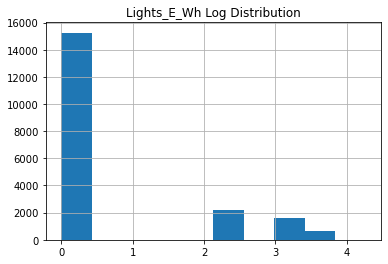

In [20]:
df['Lights_E_Wh'] = df['Lights_E_Wh'] + 1
np.log(df['Lights_E_Wh']).hist()
plt.title("Lights_E_Wh Log Distribution")
plt.subplots_adjust(hspace=0.5);

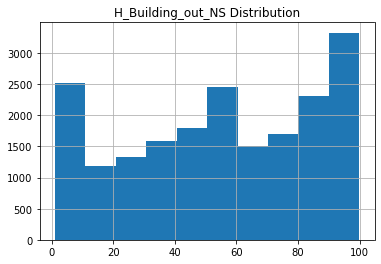

In [21]:
df['H_Building_out_NS'].hist()
plt.title("H_Building_out_NS Distribution")
plt.subplots_adjust(hspace=0.5);

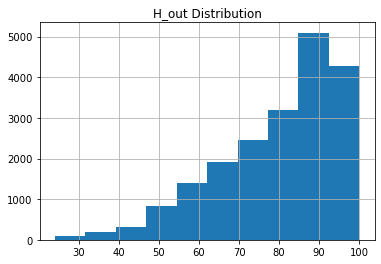

In [22]:
df['H_out'].hist();
plt.title("H_out Distribution");

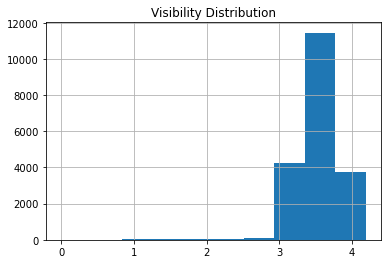

In [23]:
np.log(df['Visibility']).hist()   
plt.title("Visibility Distribution");
plt.subplots_adjust(hspace=0.5);

In [24]:
df.corr()  # Correlation matrix 

,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,H_Office,...,T_Teenager,H_Teenager,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint
Appliances_E_Wh,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353
Lights_E_Wh,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322
T_Kitchen,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309
H_Kitchen,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106
T_Living,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602
H_Living,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152
T_Laundry,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886
H_Laundry,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387
T_Office,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471
H_Office,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509


In [25]:
#sns.pairplot(df);  

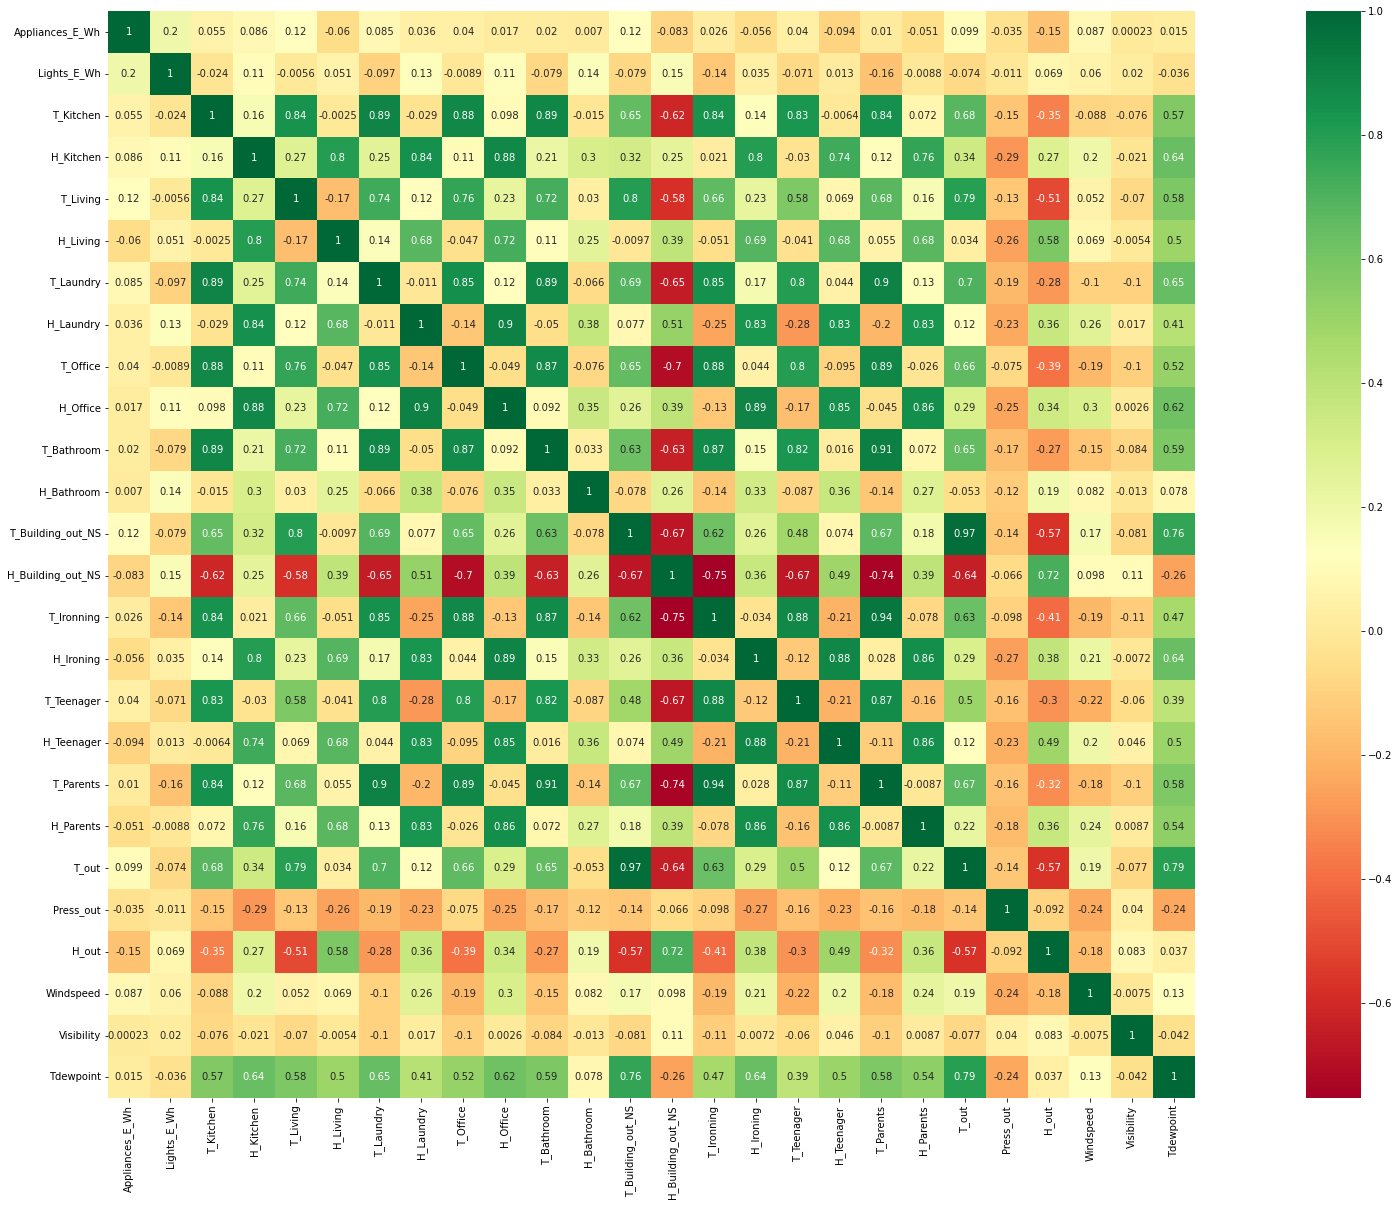

In [26]:
plt.figure(figsize=(40,20))

_ = sns.heatmap(df.corr(), annot=True, square=True, cmap='RdYlGn');

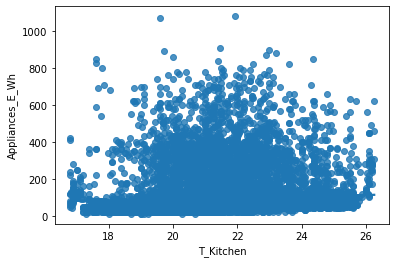

In [27]:
sns.regplot(x ='T_Kitchen', y ='Appliances_E_Wh', data = df); # Kitchen temp is expected to affect the energy usage

In [28]:
df['Appliances_E_Wh'] = np.log(df['Appliances_E_Wh'])  # log transformation of Appliances_E_Wh

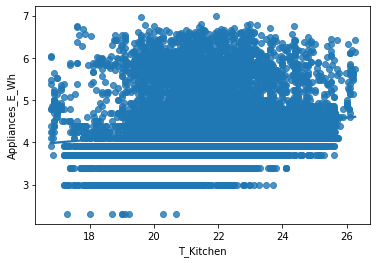

In [29]:
sns.regplot(x ='T_Kitchen', y ='Appliances_E_Wh', data = df);

In [30]:
df.corr()  # we get better coef with log transformation of Appliances_E_Wh

,Appliances_E_Wh,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,H_Office,...,T_Teenager,H_Teenager,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint
Appliances_E_Wh,1.000000,0.261442,0.160747,0.084457,0.214756,-0.093674,0.167221,-0.006462,0.132359,-0.006533,...,0.153917,-0.165397,0.092553,-0.115582,0.176161,-0.072632,-0.226185,0.087722,-0.010970,0.056241
Lights_E_Wh,0.261442,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322
T_Kitchen,0.160747,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309
H_Kitchen,0.084457,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106
T_Living,0.214756,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602
H_Living,-0.093674,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152
T_Laundry,0.167221,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886
H_Laundry,-0.006462,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387
T_Office,0.132359,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471
H_Office,-0.006533,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509


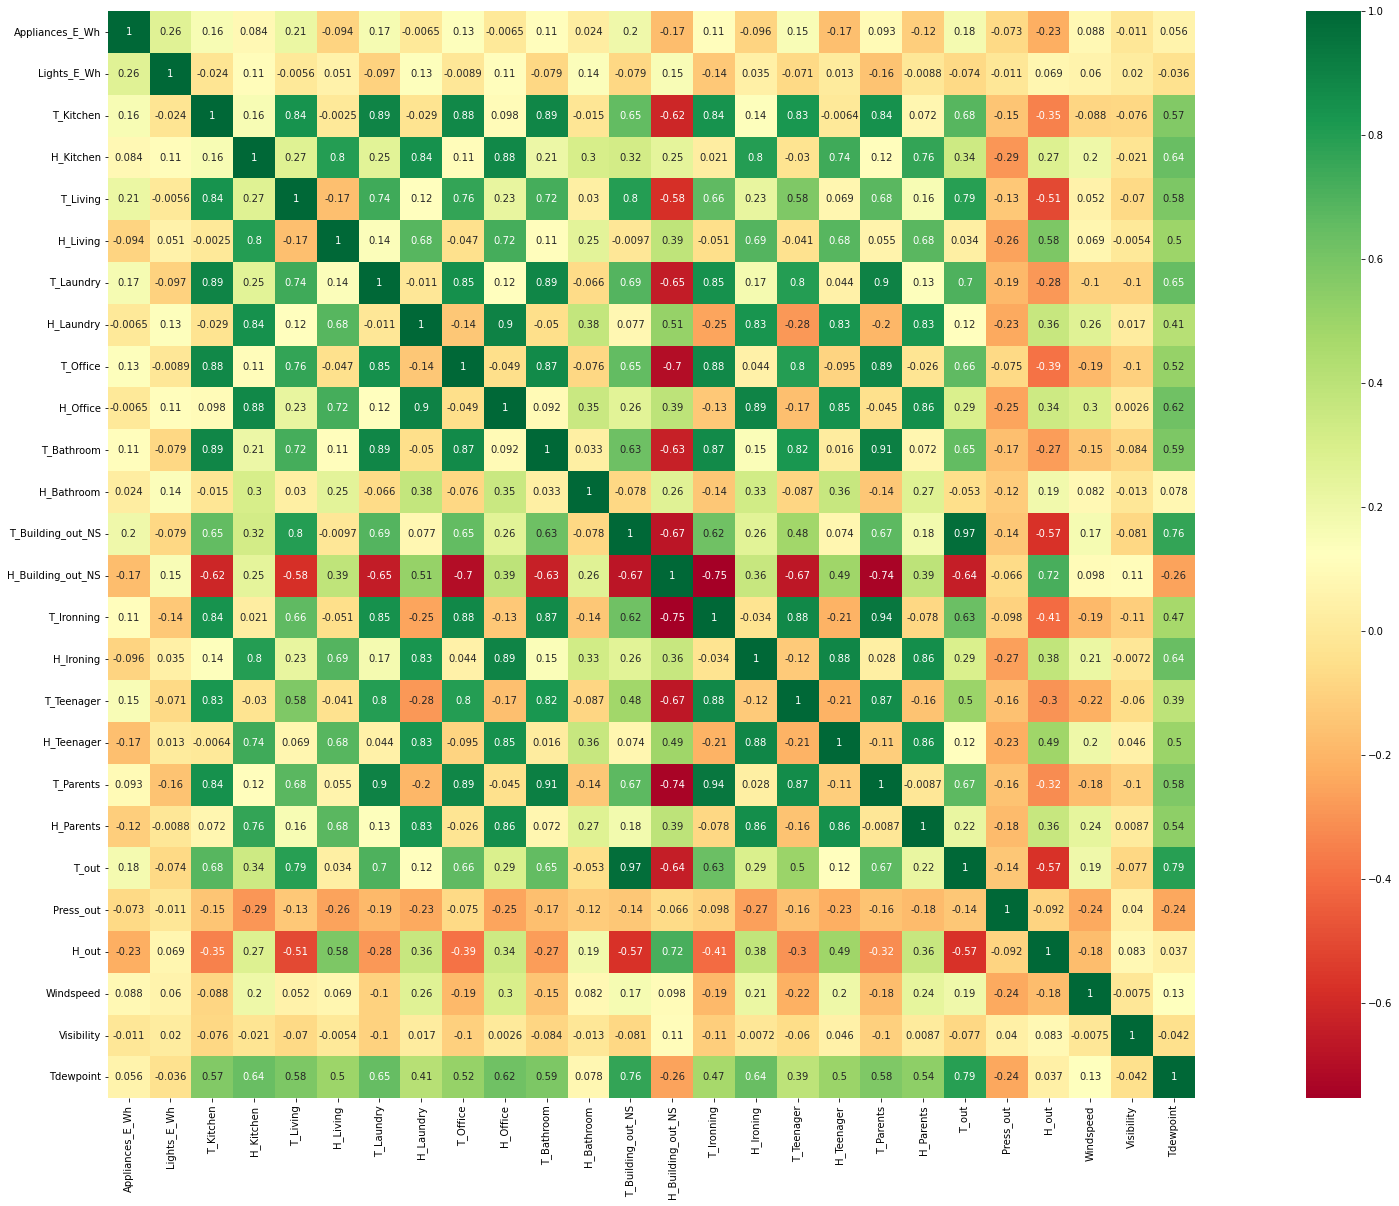

In [31]:
plt.figure(figsize=(40,20))

_ = sns.heatmap(df.corr(), annot=True, square=True, cmap='RdYlGn');

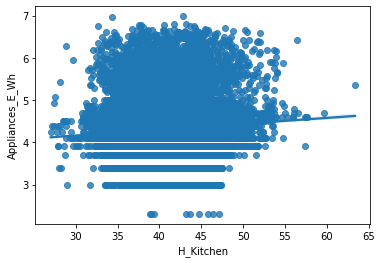

In [32]:
sns.regplot(x='H_Kitchen', y ='Appliances_E_Wh', data = df);

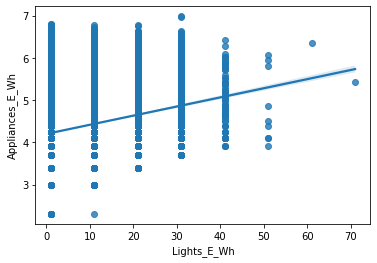

In [33]:
sns.regplot(x='Lights_E_Wh', y ='Appliances_E_Wh', data = df);

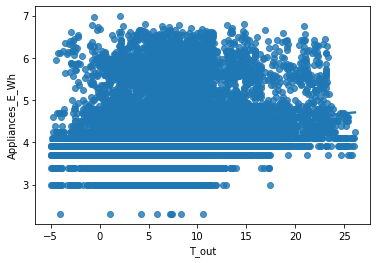

In [34]:
sns.regplot(x='T_out', y ='Appliances_E_Wh', data = df);

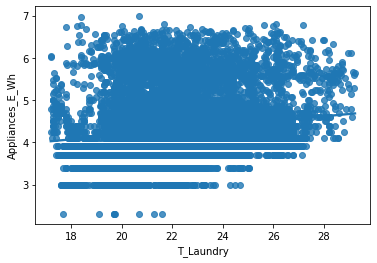

In [35]:
sns.regplot(x='T_Laundry', y ='Appliances_E_Wh', data = df);

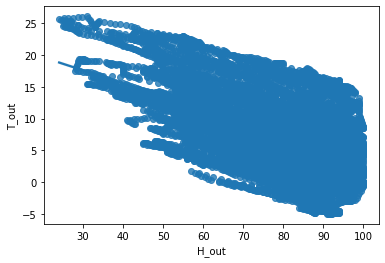

In [36]:
sns.regplot(x='H_out', y ='T_out', data = df);  # relationship of features with each other 

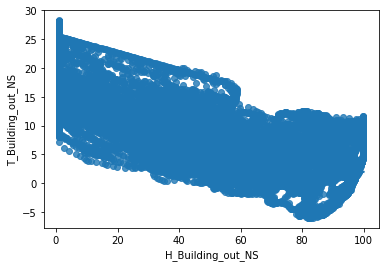

In [37]:
sns.regplot(x='H_Building_out_NS', y ='T_Building_out_NS', data = df); # relationship of features with each other 

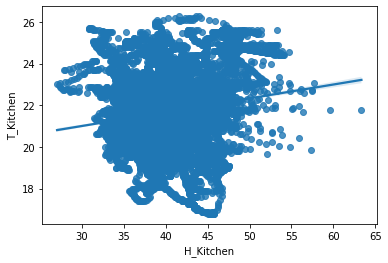

In [38]:
sns.regplot(x='H_Kitchen', y ='T_Kitchen', data = df); # relationship of features with each other 

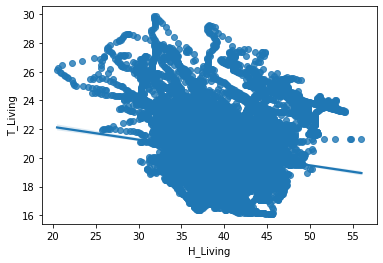

In [39]:
sns.regplot(x='H_Living', y ='T_Living', data = df); # relationship of features with each other 

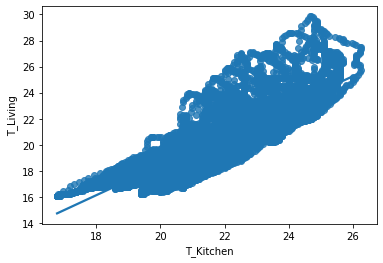

In [40]:
sns.regplot(x='T_Kitchen', y ='T_Living', data = df);

# Preprocessing and Training Data Development

_Define the X and y_

In [41]:
y = df[['Appliances_E_Wh']]

X = df.drop(["Appliances_E_Wh", "date"],axis=1)  # considering all the variables except the date 

In [42]:
y.head()

,Appliances_E_Wh
0,4.094345
1,4.094345
2,3.912023
3,3.912023
4,4.094345


In [43]:
X.head()

,Lights_E_Wh,T_Kitchen,H_Kitchen,T_Living,H_Living,T_Laundry,H_Laundry,T_Office,H_Office,T_Bathroom,...,T_Teenager,H_Teenager,T_Parents,H_Parents,T_out,Press_out,H_out,Windspeed,Visibility,Tdewpoint
0,31,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,31,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,31,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,41,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,41,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


_Creating a 70/30 train and test split_

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13814, 25), (5921, 25), (13814, 1), (5921, 1))

Using Sklearn, standarizing the magnitude of the features by scaling the values.

_Note: We need to fit() our scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while we standardize our data_

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled.shape

(13814, 25)

In [48]:
X_test_scaled.shape

(5921, 25)

# Modeling 

**First Model**  Linear Regression Nonscaled data 

In [49]:
rModel1= linear_model.LinearRegression(normalize=True)

In [50]:
rModel1.fit(X_train, y_train)

LinearRegression(normalize=True)

In [51]:
rModel1.score(X_train, y_train)   # training set accuracy 

0.27122441785249785

In [52]:
rModel1.score(X_test, y_test) # test set accuracy 

0.28012300902707965

In [53]:
rModel1.coef_

array([[ 1.63913520e-02,  1.66105330e-02,  1.08669029e-01,
        -9.71127038e-02, -8.25340322e-02,  1.53112627e-01,
         2.50392090e-02, -2.27420864e-02, -3.74606589e-03,
         3.96420323e-03,  2.96134908e-03,  5.24909601e-02,
         2.76784245e-03, -2.49720175e-02, -5.58314042e-03,
         1.00741194e-01, -4.51314333e-02, -1.09617311e-01,
        -1.33077831e-02, -7.52750931e-02, -1.03878742e-04,
        -8.85298150e-03,  1.42787493e-02,  9.83682672e-04,
         4.19878072e-02]])

In [54]:
rModel1.intercept_

array([4.43779691])

In [55]:
y_pred1 = rModel1.predict(X_test)

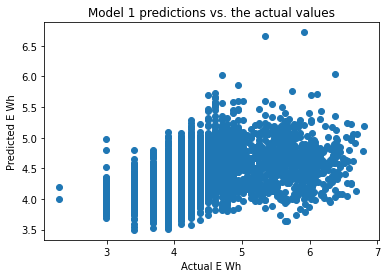

In [56]:
plt.scatter(y_test,y_pred1)
plt.title("Model 1 predictions vs. the actual values")
plt.xlabel('Actual E Wh')
plt.ylabel('Predicted E Wh');

**First Model** Linear Regression Scaled data

In [58]:
rModel1_s= linear_model.LinearRegression(normalize=True)

In [59]:
rModel1_s.fit(X_train_scaled, y_train)

LinearRegression(normalize=True)

In [64]:
rModel1_s.score(X_train_scaled, y_train)   # training set accuracy 

0.27122441785249796

In [65]:
rModel1_s.score(X_test_scaled, y_test) # test set accuracy 

0.28012300902707954

In [66]:
rModel1_s.coef_

array([[ 0.13074235,  0.02672969,  0.43116503, -0.21311231, -0.33607356,
         0.30683661,  0.08140753, -0.04651039, -0.0162244 ,  0.00732276,
         0.02673439,  0.32004103,  0.08621609, -0.05276893, -0.0285307 ,
         0.19720284, -0.23585263, -0.22133185, -0.05529019, -0.40074226,
        -0.0007652 , -0.13195244,  0.03486214,  0.01165166,  0.17638895]])

In [67]:
y_pred1_s = rModel1.predict(X_test_scaled)

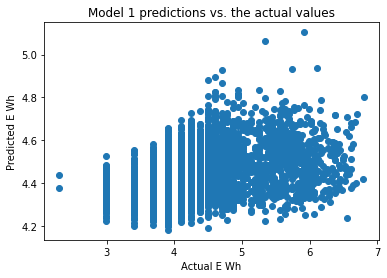

In [68]:
plt.scatter(y_test,y_pred1_s)
plt.title("Model 1 predictions vs. the actual values")
plt.xlabel('Actual E Wh')
plt.ylabel('Predicted E Wh');

**2nd Model**  OLS

In [69]:
X_train_osl = sm.add_constant(X_train)
X_test_osl = sm.add_constant(X_test)

In [71]:
rModel2 = sm.OLS(y_train, X_train_osl)

In [72]:
rModel2_results = rModel2.fit()   

In [73]:
rModel2_results.summary()   # 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Appliances_E_Wh   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     205.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:13:27   Log-Likelihood:                -11558.
No. Observations:               13814   AIC:                         2.317e+04
Df Residuals:                   13788   BIC:                         2.336e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4378      0.679      6.540      0.000       3.108       5.768
Lights_E_Wh           0.0164      0.001     24.190      0.000       0.015       0.018
T_Kitchen             0.0166      0.013      1.257      0.209      -0.009       0.043
H_Kitchen             0.1087      0.005     22.468      0.000       0.099       0.118
T_Living             -0.0971      0.012     -8.308      0.000      -0.120      -0.074
H_Living             -0.0825      0.005    -15.031      0.000      -0.093      -0.072
T_Laundry             0.1531      0.008     20.291      0.000       0.138       0.168
H_Laundry             0.0250      0.005      5.183      0.000       0.016       0.035
T_Office             -0.0227      0.007     -3.087      0.002      -0.037      -0.008
H_Office             -0.0037      0.005     -0.828      0.408      -0.013       0.005
T_Bathroom            0.0040      0.008      0.475      0.634      -0.012       0.020
H_Bathroom            0.0030      0.001      4.792      0.000       0.002       0.004
T_Building_out_NS     0.0525      0.005     11.552      0.000       0.044       0.061
H_Building_out_NS     0.0028      0.000      5.744      0.000       0.002       0.004
T_Ironning           -0.0250      0.009     -2.666      0.008      -0.043      -0.007
H_Ironing            -0.0056      0.003     -1.832      0.067      -0.012       0.000
T_Teenager            0.1007      0.007     14.473      0.000       0.087       0.114
H_Teenager           -0.0451      0.003    -16.999      0.000      -0.050      -0.040
T_Parents            -0.1096      0.013     -8.733      0.000      -0.134      -0.085
H_Parents            -0.0133      0.003     -4.570      0.000      -0.019      -0.008
T_out                -0.0753      0.011     -6.888      0.000      -0.097      -0.054
Press_out            -0.0001      0.001     -0.135      0.892      -0.002       0.001
H_out                -0.0089      0.002     -3.932      0.000      -0.013      -0.004
Windspeed             0.0143      0.002      5.791      0.000       0.009       0.019
Visibility            0.0010      0.000      2.403      0.016       0.000       0.002
Tdewpoint             0.0420      0.011      3.959      0.000       0.021       0.063
==============================================================================
Omnibus:                     3248.039   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8046.581
Skew:                           1.294   Prob(JB):                         0.00
Kurtosis:                       5.699   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The conditi

In [74]:
y_pred2 = rModel2_results.predict(X_test_osl)

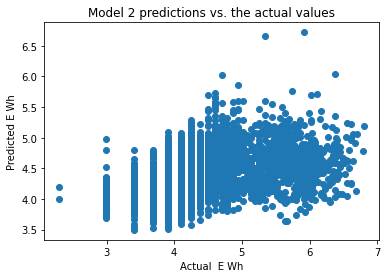

In [75]:
plt.scatter(y_test,y_pred2)
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel('Actual  E Wh')
plt.ylabel('Predicted E Wh');

In [76]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [77]:
matches = pd.DataFrame(y_test)
matches.rename(columns = {'Actual E Wh':'actual'}, inplace=True)
matches["predicted"] = y_pred2

In [78]:
rmse(matches["actual"], matches["predicted"])

KeyError: 'actual'

**Model 3** OLS with & Removing the variables with large p_values

In [79]:
y = df[['Appliances_E_Wh']]

X = df.drop(["Appliances_E_Wh", "date", "T_Kitchen", "H_Office", "T_Bathroom", "H_Ironing", "Tdewpoint", "H_out"],axis=1)  # Removing the variables with large p_values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 123)

In [81]:
X = sm.add_constant(X)
rModel3 = sm.OLS(y_train, X_train)
rModel3_results = rModel3.fit() 
rModel3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Appliances_E_Wh   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          4.293e+04
Date:                Wed, 06 Apr 2022   Prob (F-statistic):                        0.00
Time:                        13:15:33   Log-Likelihood:                         -11637.
No. Observations:               13814   AIC:                                  2.331e+04
Df Residuals:                   13795   BIC:                                  2.345e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Lights_E_Wh           0.0167      0.001     24.834      0.000       0.015       0.018
H_Kitchen             0.1056      0.004     25.379      0.000       0.097       0.114
T_Living             -0.0968      0.008    -12.092      0.000      -0.112      -0.081
H_Living             -0.0822      0.004    -19.131      0.000      -0.091      -0.074
T_Laundry             0.1669      0.007     24.916      0.000       0.154       0.180
H_Laundry             0.0311      0.005      6.850      0.000       0.022       0.040
T_Office             -0.0290      0.007     -4.339      0.000      -0.042      -0.016
H_Bathroom            0.0032      0.001      5.398      0.000       0.002       0.004
T_Building_out_NS     0.0519      0.004     12.482      0.000       0.044       0.060
H_Building_out_NS     0.0022      0.000      5.269      0.000       0.001       0.003
T_Ironning           -0.0278      0.008     -3.280      0.001      -0.044      -0.011
T_Teenager            0.1153      0.006     18.876      0.000       0.103       0.127
H_Teenager           -0.0483      0.002    -22.091      0.000      -0.053      -0.044
T_Parents            -0.1052      0.011     -9.678      0.000      -0.127      -0.084
H_Parents            -0.0175      0.003     -6.258      0.000      -0.023      -0.012
T_out                -0.0380      0.004     -8.554      0.000      -0.047      -0.029
Press_out             0.0044      0.000     29.314      0.000       0.004       0.005
Windspeed             0.0203      0.002      9.147      0.000       0.016       0.025
Visibility            0.0008      0.000      1.941      0.052   -7.68e-06       0.002
==============================================================================
Omnibus:                     3122.309   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7571.817
Skew:                           1.254   Prob(JB):                         0.00
Kurtosis:                       5.621   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred3 = rModel3_results.predict(X_test)

In [ ]:
plt.scatter(y_test,y_pred3)
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel('Actual  E Wh')
plt.ylabel('Predicted E Wh');